<a href="https://colab.research.google.com/github/MachokaGit/Machine-Learning/blob/main/wordcloud_NLP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
pip install tweepy pandas nltk textblob sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [53]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [54]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = 'REF TWEETS.csv'  # Update with the correct path if necessary
# Example for Google Colab: csv_file = '/content/REF TWEETS.csv'

df = pd.read_csv(csv_file)

# View the first few rows to confirm the structure
print(df.head())

   ID               Date Created  Number of Likes  \
0   1  2022-11-21 22:37:33+00:00                5   
1   2  2022-11-21 22:12:57+00:00                1   
2   3  2022-11-21 22:07:05+00:00                7   
3   4  2022-11-21 21:48:16+00:00                1   
4   5  2022-11-21 21:38:01+00:00                0   

                                               Tweet Sentiment  
0  The first female referee at a Men’s World Cup ...   Neutral  
1  North Korea will host the World Cup in 2030. W...   Neutral  
2  If you're wondering why there has been so much...   Neutral  
3  NFL referee: “We will scrutinize every angle o...  Negative  
4  Possibly imagining it, but feel like there are...   Neutral  


In [55]:
df


,ID,Date Created,Number of Likes,Tweet,Sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral
...,...,...,...,...,...
3995,3996,2022-12-18 18:34:04+00:00,8,"Meanwhile, Mbappe gave us a World Cup we’d nev...",Neutral
3996,3997,2022-12-18 18:31:07+00:00,0,How wonderful in this day and age.. at the Wor...,Negative
3997,3998,2022-12-18 18:30:39+00:00,0,World cup: referees get medals after the final...,Neutral
3998,3999,2022-12-18 18:30:15+00:00,0,This argentina the whole journey Copa America ...,Neutral


In [56]:
import pandas as pd
from textblob import TextBlob


# Define a function to compute sentiment
def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity  # Polarity: -1 (negative) to 1 (positive)

# Apply sentiment analysis to the 'tweet' column and create a new 'sentiment' column
df['sentiment'] = df['Tweet'].apply(analyze_sentiment)


df.head()

,ID,Date Created,Number of Likes,Tweet,Sentiment,sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,-0.046296
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,0.350000
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,0.233333
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,0.325000
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,-0.133333


Sentiment Statistics:
count    4000.000000
mean       -0.020357
std         0.336700
min        -1.000000
25%        -0.170000
50%         0.000000
75%         0.157209
max         1.000000
Name: sentiment, dtype: float64


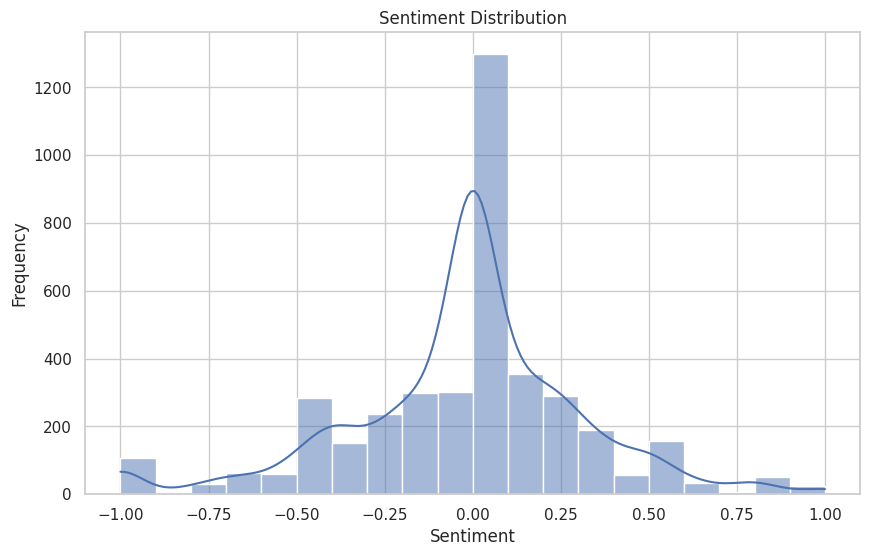

In [57]:
# Check basic statistics for sentiment
print("Sentiment Statistics:")
print(df['sentiment'].describe())

# Plot sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of sentiment values
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


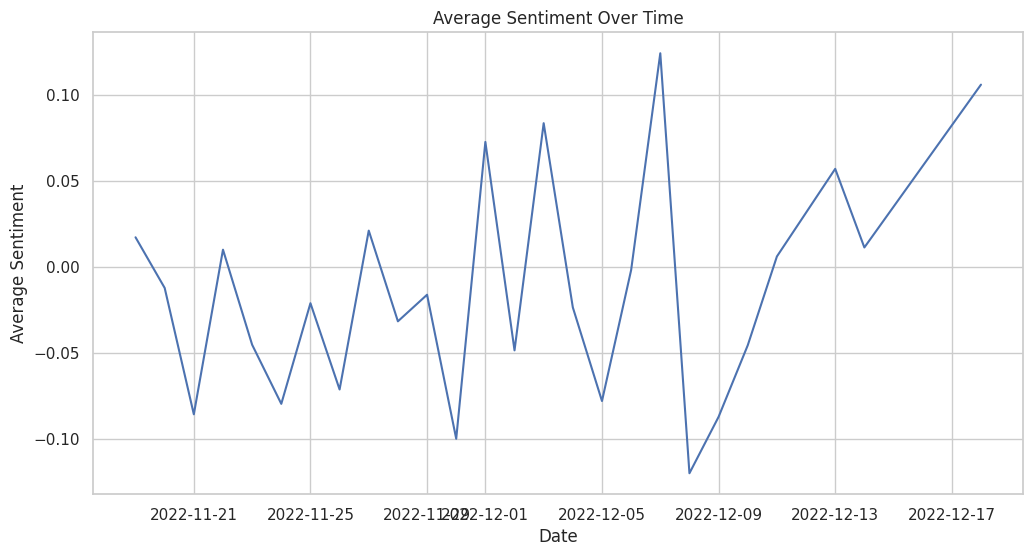

In [58]:
# Convert the 'date' column to datetime format if it's not already
df['date'] = pd.to_datetime(df['Date Created'])

# Group by date and calculate average sentiment for each day
daily_sentiment = df.groupby(df['date'].dt.date)['sentiment'].mean()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()


In [59]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Ensure stopwords are available
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# Tokenization & word frequency count
def get_most_common_words(texts, n=10):
    words = ' '.join(texts).lower().split()
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords]
    return Counter(filtered_words).most_common(n)

# Apply tokenization and show top words
common_words = get_most_common_words(df['Tweet'], 15)
print("Most Common Words:", common_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words: [('world', 3300), ('cup', 2432), ('referee', 1829), ('ref', 1790), ('game', 604), ('match', 305), ('get', 286), ('first', 274), ('argentina', 271), ('time', 270), ('england', 267), ('one', 240), ('var', 237), ('fifa', 235), ('penalty', 234)]


In [60]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['Tweet'])
keywords = vectorizer.get_feature_names_out()

print("Top Keywords:", keywords)


Top Keywords: ['argentina' 'cup' 'england' 'fifa' 'fifaworldcup' 'final' 'france' 'game'
 'just' 'match' 'messi' 'penalty' 'ref' 'referee' 'team' 'time' 'var'
 'win' 'world' 'worldcup']


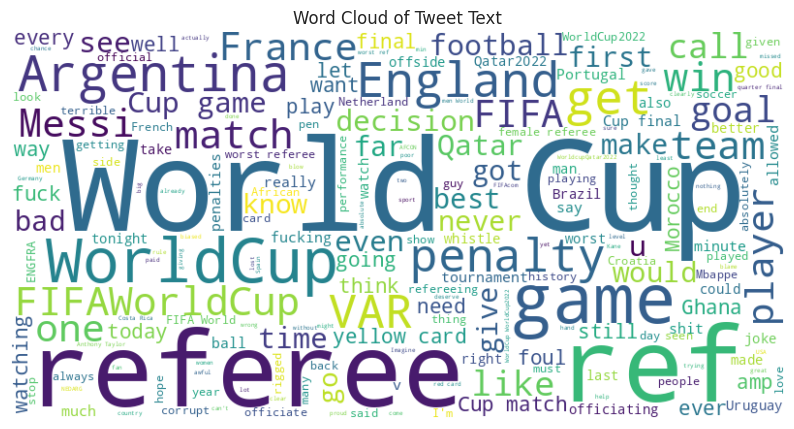

In [61]:
from wordcloud import WordCloud

# Create a word cloud from tweet text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(' '.join(df['Tweet']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()


In [62]:
# Bigrams and Trigrams
def get_ngrams(texts, n=2, top_n=10):
    from sklearn.feature_extraction.text import CountVectorizer
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Example: Bigrams
bigrams = get_ngrams(df['Tweet'], n=2, top_n=10)
print("Most Common Bigrams:", bigrams)


Most Common Bigrams: [('world cup', 3251), ('referee world', 243), ('ref world', 225), ('cup game', 162), ('cup match', 121), ('cup ref', 115), ('cup referee', 113), ('win world', 105), ('cup final', 85), ('game world', 81)]


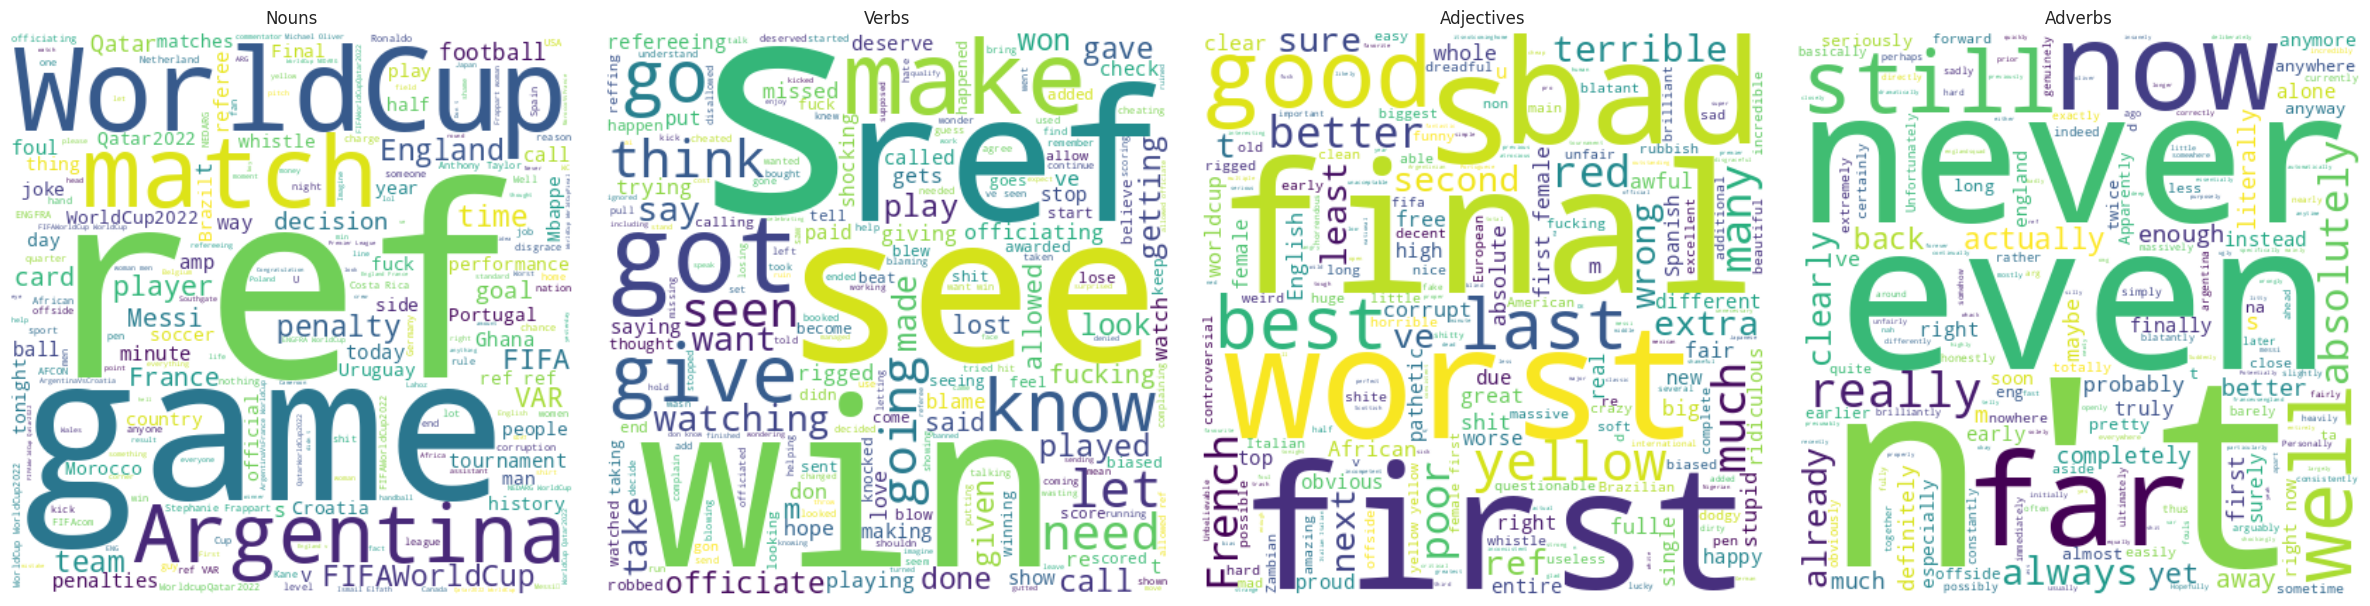

In [63]:


# List of words to exclude
exclude_words = ['referee', 'world', 'cup']

# Extract nouns, verbs, adjectives, and adverbs
nouns = [word for word in get_pos_words(all_tweets, 'NN') if word.lower() not in exclude_words]  # Nouns (NN, NNP, etc.)
verbs = [word for word in get_pos_words(all_tweets, 'VB') if word.lower() not in exclude_words]  # Verbs (VB, VBD, etc.)
adjectives = [word for word in get_pos_words(all_tweets, 'JJ') if word.lower() not in exclude_words]  # Adjectives (JJ, JJR, etc.)
adverbs = [word for word in get_pos_words(all_tweets, 'RB') if word.lower() not in exclude_words]  # Adverbs (RB, RBR, etc.)

# Convert lists to strings for word cloud generation
nouns_text = ' '.join(nouns)
verbs_text = ' '.join(verbs)
adjectives_text = ' '.join(adjectives)
adverbs_text = ' '.join(adverbs)

# Create word clouds for nouns, verbs, adjectives, and adverbs
noun_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(nouns_text)
verb_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(verbs_text)
adjective_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(adjectives_text)
adverb_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(adverbs_text)

# Plot the word clouds side by side
plt.figure(figsize=(24, 6))

# Nouns Word Cloud
plt.subplot(1, 4, 1)
plt.imshow(noun_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nouns')

# Verbs Word Cloud
plt.subplot(1, 4, 2)
plt.imshow(verb_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Verbs')

# Adjectives Word Cloud
plt.subplot(1, 4, 3)
plt.imshow(adjective_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adjectives')

# Adverbs Word Cloud
plt.subplot(1, 4, 4)
plt.imshow(adverb_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adverbs')

# Display the word clouds
plt.tight_layout()
plt.show()


In [64]:

from ipywidgets import interact, Dropdown
from IPython.display import display

# Convert lists to strings for word cloud generation
wordcloud_data = {
    'Nouns': ' '.join(nouns),
    'Verbs': ' '.join(verbs),
    'Adjectives': ' '.join(adjectives),
    'Adverbs': ' '.join(adverbs)
}

# Function to generate and display a word cloud based on selected POS
def update_wordcloud(pos):
    # Create the word cloud for the selected part of speech
    wc = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data[pos])

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{pos} Word Cloud', fontsize=16)
    plt.show()

# Create a dropdown menu to select the part of speech
pos_dropdown = Dropdown(
    options=['Nouns', 'Verbs', 'Adjectives', 'Adverbs'],
    value='Nouns',
    description='POS:',
)

# Use ipywidgets interact to dynamically update the chart based on dropdown selection
interact(update_wordcloud, pos=pos_dropdown)


interactive(children=(Dropdown(description='POS:', options=('Nouns', 'Verbs', 'Adjectives', 'Adverbs'), value=…

<function __main__.update_wordcloud(pos)>

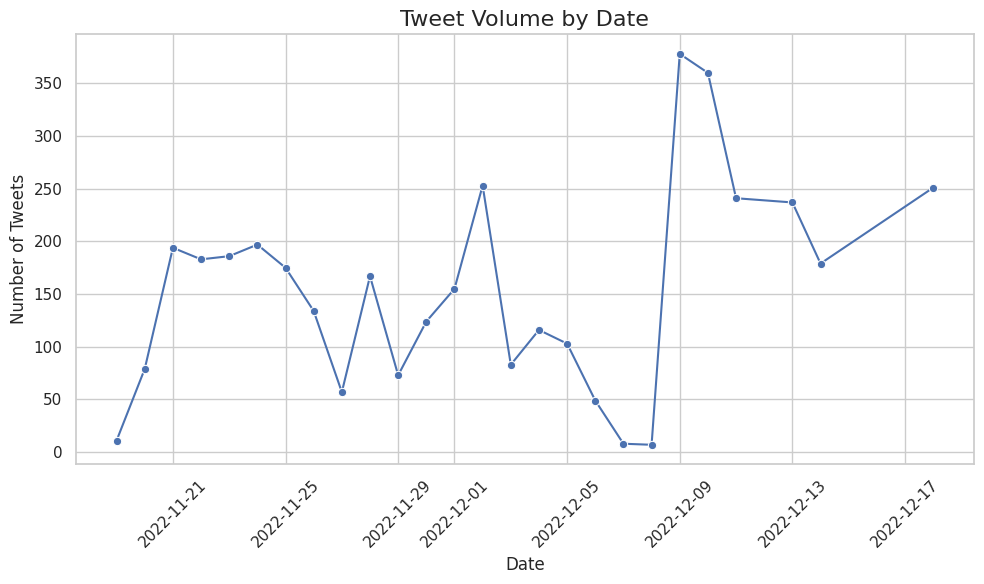

<ipython-input-65-1ec8042f92ee>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tweet_hour', y='count', data=tweet_volume_by_hour, palette='Blues_d')


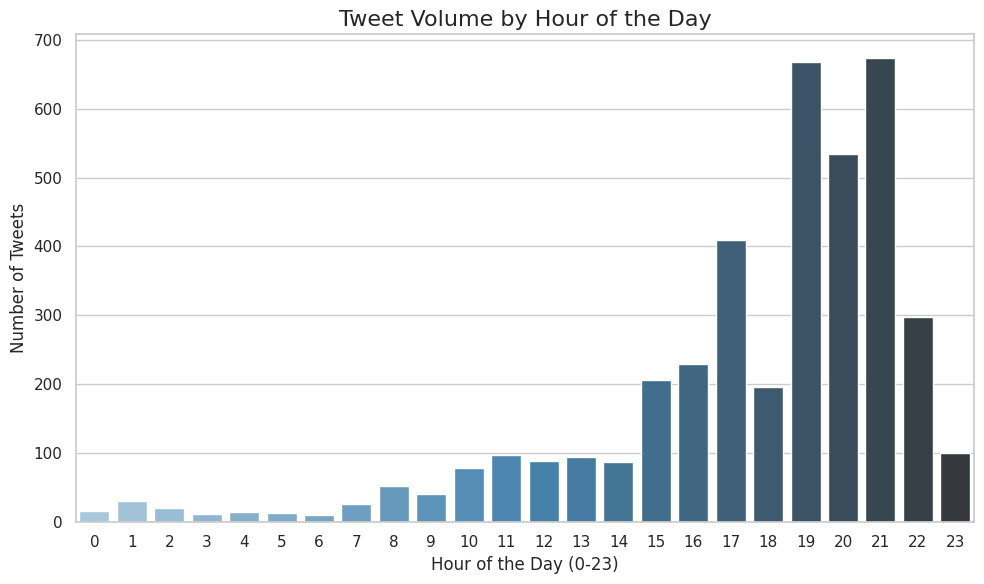

<ipython-input-65-1ec8042f92ee>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tweet_dayofweek', y='count', data=tweet_volume_by_dayofweek, palette='Greens_d')


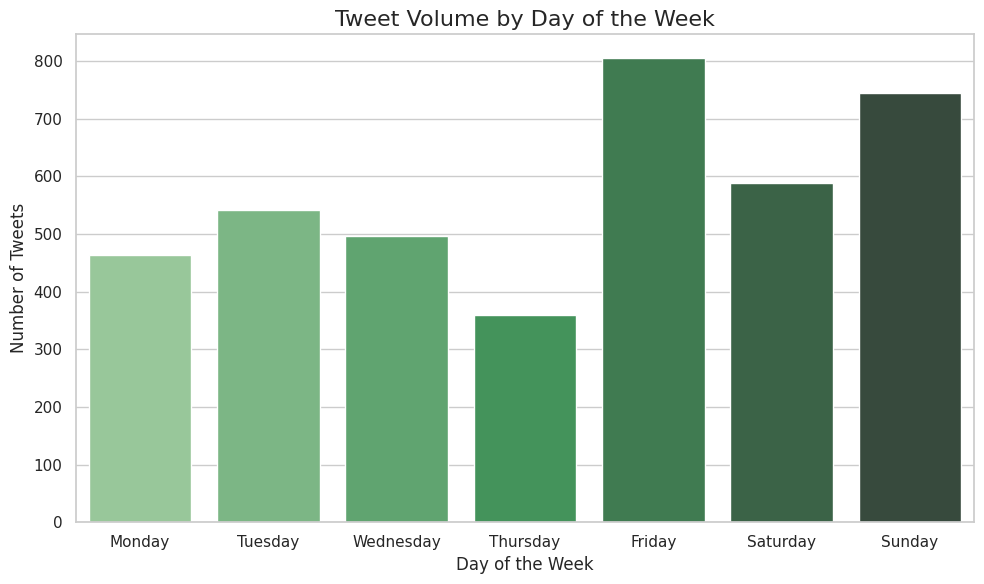

In [65]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['Date Created'])

# Extract the necessary components for analysis
df['tweet_date'] = df['date'].dt.date  # Date (year-month-day)
df['tweet_hour'] = df['date'].dt.hour  # Hour of the day (0-23)
df['tweet_dayofweek'] = df['date'].dt.day_name()  # Day of the week (e.g., Monday)

# Set the style for the plots
sns.set(style="whitegrid")

### 1. Tweet Volume by Date ###
tweet_volume_by_date = df.groupby('tweet_date').size().reset_index(name='count')

# Plotting the tweet volume by date
plt.figure(figsize=(10, 6))
sns.lineplot(x='tweet_date', y='count', data=tweet_volume_by_date, marker="o")
plt.xticks(rotation=45)
plt.title('Tweet Volume by Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.tight_layout()
plt.show()

### 2. Tweet Volume by Hour of the Day ###
tweet_volume_by_hour = df.groupby('tweet_hour').size().reset_index(name='count')

# Plotting the tweet volume by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x='tweet_hour', y='count', data=tweet_volume_by_hour, palette='Blues_d')
plt.title('Tweet Volume by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.tight_layout()
plt.show()

### 3. Tweet Volume by Day of the Week ###
# Reorder the days of the week to start with Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweet_volume_by_dayofweek = df.groupby('tweet_dayofweek').size().reindex(days_order).reset_index(name='count')

# Plotting the tweet volume by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='tweet_dayofweek', y='count', data=tweet_volume_by_dayofweek, palette='Greens_d')
plt.title('Tweet Volume by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.tight_layout()
plt.show()


In [79]:


# Example of how the 'likes' and 'sentiment' columns might look in the CSV:
# 'likes' should be numeric and 'sentiment' is a score (-1 to 1, or similar scale)

# Step 1: Bin the sentiment scores into positive, neutral, and negative categories
def bin_sentiment(score):
    if score > 0.1:  # You can adjust this threshold
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the binning function to the 'sentiment' column
df['sentiment_category'] = df['sentiment'].apply(bin_sentiment)

# For correlation, we will encode the sentiment categories into numerical values
# Positive = 1, Neutral = 0, Negative = -1
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_numeric'] = df['sentiment_category'].map(sentiment_mapping)

# Step 2: Compute the correlation matrix between 'likes' and the numeric sentiment
correlation_matrix = df[['Number of Likes', 'sentiment_numeric']].corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Between Likes and Sentiment')
plt.show()


KeyError: 'sentiment'

In [67]:
pip install pycountry


In [69]:
df


,ID,Date Created,Number of Likes,Tweet,Sentiment,sentiment,date,tweet_date,tweet_hour,tweet_dayofweek,sentiment_category,sentiment_numeric,cleaned_tweet,countries
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,-0.046296,2022-11-21 22:37:33+00:00,2022-11-21,22,Monday,Neutral,0,The first female referee at a Men’s World Cup ...,[]
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,0.350000,2022-11-21 22:12:57+00:00,2022-11-21,22,Monday,Positive,1,North Korea will host the World Cup in 2030. W...,[]
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,0.233333,2022-11-21 22:07:05+00:00,2022-11-21,22,Monday,Positive,1,If you're wondering why there has been so much...,[]
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,0.325000,2022-11-21 21:48:16+00:00,2022-11-21,21,Monday,Positive,1,NFL referee: “We will scrutinize every angle o...,[]
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,-0.133333,2022-11-21 21:38:01+00:00,2022-11-21,21,Monday,Negative,-1,"Possibly imagining it, but feel like there are...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,2022-12-18 18:34:04+00:00,8,"Meanwhile, Mbappe gave us a World Cup we’d nev...",Neutral,0.037500,2022-12-18 18:34:04+00:00,2022-12-18,18,Sunday,Neutral,0,"Meanwhile, Mbappe gave us a World Cup we’d nev...",[]
3996,3997,2022-12-18 18:31:07+00:00,0,How wonderful in this day and age.. at the Wor...,Negative,0.333333,2022-12-18 18:31:07+00:00,2022-12-18,18,Sunday,Positive,1,How wonderful in this day and age.. at the Wor...,[]
3997,3998,2022-12-18 18:30:39+00:00,0,World cup: referees get medals after the final...,Neutral,0.000000,2022-12-18 18:30:39+00:00,2022-12-18,18,Sunday,Neutral,0,World cup: referees get medals after the final...,[Philippines]
3998,3999,2022-12-18 18:30:15+00:00,0,This argentina the whole journey Copa America ...,Neutral,0.200000,2022-12-18 18:30:15+00:00,2022-12-18,18,Sunday,Positive,1,This argentina the whole journey Copa America ...,[]


In [68]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
from IPython.display import display
import pycountry


# Tokenization and POS tagging
def get_pos_words(text, pos_tag):
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    pos_tags = nltk.pos_tag(tokens)     # POS tagging
    return [word for word, tag in pos_tags if tag.startswith(pos_tag)]  # Filter by POS tag

# Exclude words after hashtag
def clean_tweet(text):
    return ' '.join(text.split('#')[0:1])  # Only keep the text before the first hashtag

# Clean the tweets
df['cleaned_tweet'] = df['Tweet'].apply(clean_tweet)

# Function to extract country names mentioned in the cleaned tweets
def extract_countries(text):
    country_list = [country.name for country in pycountry.countries]
    return [country for country in country_list if country in text]

# Add a column for countries mentioned in each cleaned tweet
df['countries'] = df['cleaned_tweet'].apply(extract_countries)

# Get a unique list of all countries mentioned in the dataset
all_countries = sorted(set([country for sublist in df['countries'] for country in sublist]))

# Function to extract wordcloud data based on sentiment, POS, and country
def get_filtered_words(sentiment, pos_tag, country):
    # Filter tweets by sentiment and country
    filtered_tweets = ' '.join(df[(df['sentiment_category'] == sentiment) &
                                   (df['countries'].apply(lambda x: country in x))]['cleaned_tweet'])

    # Extract words based on the selected part of speech
    pos_words = [word for word in get_pos_words(filtered_tweets, pos_tag) if word.lower() not in exclude_words]

    return ' '.join(pos_words)

# Function to update the word cloud based on selected sentiment, POS, and country
def update_wordcloud(pos, sentiment, country):
    # Get the filtered words based on sentiment, POS, and country
    words = get_filtered_words(sentiment, pos[:2], country)  # Extracting the POS prefix (NN, VB, etc.)

    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{pos} Word Cloud ({sentiment} Sentiment, {country})', fontsize=16)
    plt.show()

# Create a dropdown menu for the part of speech

# Create a dropdown menu for the part of speech with 'All' option
pos_dropdown = Dropdown(
    options={'All': '', 'Nouns': 'NN', 'Verbs': 'VB', 'Adjectives': 'JJ', 'Adverbs': 'RB'},
    value='',
    description='POS:',
)

# Create a dropdown menu for the sentiment categories with 'All' option
sentiment_dropdown = Dropdown(
    options=['All', 'Positive', 'Neutral', 'Negative'],
    value='All',
    description='Sentiment:',
)

# Create a dropdown menu for the country selection with 'All' option
country_dropdown = Dropdown(
    options=['All'] + all_countries,  # Add 'All' to the countries list
    value='All',  # Default to 'All'
    description='Country:',
)


# Use ipywidgets interact to dynamically update the chart based on dropdown selections
interact(update_wordcloud, pos=pos_dropdown, sentiment=sentiment_dropdown, country=country_dropdown)


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [71]:

# Example of how sentiment is structured (you can modify based on your actual sentiment column):
# Assuming the sentiment column contains values from -1 (negative) to 1 (positive)
def bin_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(bin_sentiment)

# Tokenization and POS tagging
def get_pos_words(text, pos_tag):
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    pos_tags = nltk.pos_tag(tokens)     # POS tagging
    return [word for word, tag in pos_tags if tag.startswith(pos_tag)]  # Filter by POS tag

# List of words to exclude
exclude_words = ['referee', 'world', 'cup']

# Function to extract wordcloud data based on sentiment and POS
def get_filtered_words(sentiment, pos_tag):
    # Filter tweets by sentiment
    filtered_tweets = ' '.join(df[df['sentiment_category'] == sentiment]['Tweet'])

    # Extract words based on the selected part of speech
    pos_words = [word for word in get_pos_words(filtered_tweets, pos_tag) if word.lower() not in exclude_words]

    return ' '.join(pos_words)

# Function to update the word cloud based on selected sentiment and POS
def update_wordcloud(pos, sentiment):
    # Get the filtered words based on sentiment and POS
    words = get_filtered_words(sentiment, pos[:2])  # Extracting the POS prefix (NN, VB, etc.)

    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{pos} Word Cloud ({sentiment} Sentiment)', fontsize=16)
    plt.show()

# Create a dropdown menu for the part of speech
pos_dropdown = Dropdown(
    options={'Nouns': 'NN', 'Verbs': 'VB', 'Adjectives': 'JJ', 'Adverbs': 'RB'},
    value='NN',
    description='POS:',
)

# Create a dropdown menu for the sentiment categories
sentiment_dropdown = Dropdown(
    options=['Positive', 'Neutral', 'Negative'],
    value='Positive',
    description='Sentiment:',
)

# Use ipywidgets interact to dynamically update the chart based on dropdown selections
interact(update_wordcloud, pos=pos_dropdown, sentiment=sentiment_dropdown)


interactive(children=(Dropdown(description='POS:', options={'Nouns': 'NN', 'Verbs': 'VB', 'Adjectives': 'JJ', …

<function __main__.update_wordcloud(pos, sentiment)>

In [78]:
df

,ID,Date Created,Number of Likes,Tweet,Sentiment,tokens
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,"[the, first, female, referee, at, a, men, ’, s..."
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,"[north, korea, will, host, the, world, cup, in..."
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,"[if, you, 're, wondering, why, there, has, bee..."
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,"[nfl, referee, :, “, we, will, scrutinize, eve..."
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,"[possibly, imagining, it, ,, but, feel, like, ..."
...,...,...,...,...,...,...
3995,3996,2022-12-18 18:34:04+00:00,8,"Meanwhile, Mbappe gave us a World Cup we’d nev...",Neutral,"[meanwhile, ,, mbappe, gave, us, a, world, cup..."
3996,3997,2022-12-18 18:31:07+00:00,0,How wonderful in this day and age.. at the Wor...,Negative,"[how, wonderful, in, this, day, and, age, .., ..."
3997,3998,2022-12-18 18:30:39+00:00,0,World cup: referees get medals after the final...,Neutral,"[world, cup, :, referees, get, medals, after, ..."
3998,3999,2022-12-18 18:30:15+00:00,0,This argentina the whole journey Copa America ...,Neutral,"[this, argentina, the, whole, journey, copa, a..."


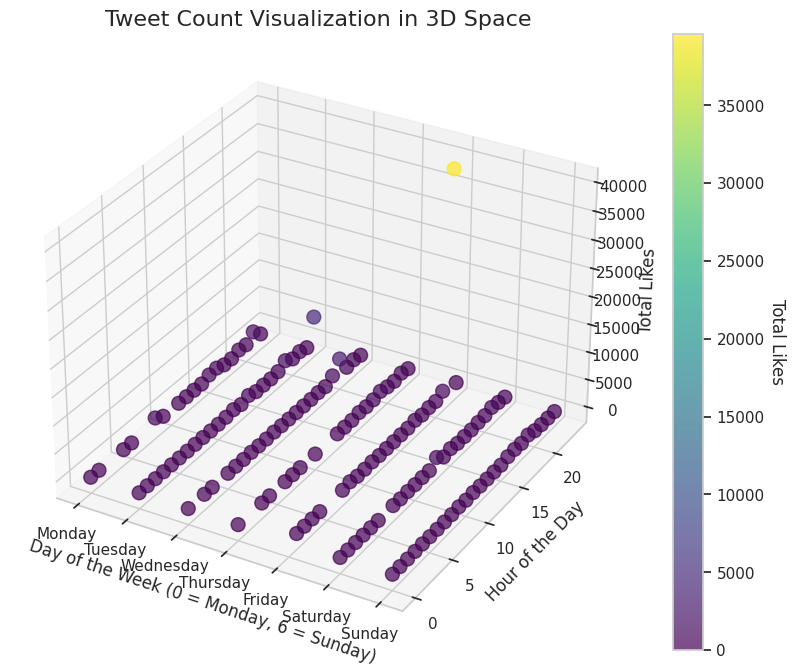

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['Date Created'])

# Extract day of the week and hour of the day
df['day_of_week'] = df['date'].dt.day_name()  # Get the day name
df['hour'] = df['date'].dt.hour  # Get the hour

# Map days of the week to numbers for plotting
days_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week_num'] = df['day_of_week'].map(days_mapping)

# Group by day of the week and hour, aggregating the likes
agg_data = df.groupby(['day_of_week_num', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=100, alpha=0.7)

# Customize the plot
ax.set_title('Tweet Count Visualization in 3D Space', fontsize=16)
ax.set_xlabel('Day of the Week (0 = Monday, 6 = Sunday)', fontsize=12)
ax.set_ylabel('Hour of the Day', fontsize=12)
ax.set_zlabel('Total Likes', fontsize=12)

# Set ticks for x-axis to display day names
ax.set_xticks(list(days_mapping.values()))
ax.set_xticklabels(list(days_mapping.keys()))

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Total Likes', rotation=270, labelpad=15)

# Turn on interactive mode
plt.ion()
plt.show()

# Keep the plot open and allow for rotation
#plt.ioff()  # Turn off interactive mode when you're done

In [88]:
# prompt: swap the hour and total like axes on the previous chart but use plotly scatter 3d plot instead and scale to tweets less than 2000 likes

import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame and it has 'day_of_week_num', 'hour', and 'total_likes' columns
# ... (Your code to create df and its columns) ...

# Filter tweets with less than 2000 likes
df_filtered = df[df['Number of Likes'] < 2000]

# Group by day of the week and hour, aggregating the likes
agg_data = df_filtered.groupby(['day_of_week_num', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['total_likes']
y = agg_data['day_of_week_num']
z = agg_data['hour']

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=x,  # Set marker color to an array of desired values
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Customize the plot
fig.update_layout(
    title='Tweet Count Visualization in 3D Space (Likes < 2000)',
    scene=dict(
        xaxis_title='Total Likes',
        yaxis_title='Day of the Week (0 = Monday, 6 = Sunday)',
        zaxis_title='Hour of the Day'
    )
)

# Set ticks for y-axis to display day names
days_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
fig.update_layout(
    scene=dict(
        yaxis=dict(
            tickmode='array',
            tickvals=list(days_mapping.keys()),
            ticktext=list(days_mapping.values())
        )
    )
)


fig.show()

In [94]:
# prompt: add a sentiment score column to df and recreate the plot but with the colour of the points being the sentiment type

# Assuming df is your DataFrame and it has a 'Tweet' column
# ... (Your code to create df and its columns) ...

# Calculate sentiment scores
df['sentiment'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Create a new column for sentiment category (positive, negative, neutral)
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['Date Created'])

# Extract day of the week and hour of the day
df['day_of_week'] = df['date'].dt.day_name()  # Get the day name
df['hour'] = df['date'].dt.hour  # Get the hour

# Map days of the week to numbers for plotting
days_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week_num'] = df['day_of_week'].map(days_mapping)

# Group by day of the week and hour, aggregating the likes
agg_data = df.groupby(['day_of_week_num', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['total_likes']
y = agg_data['day_of_week_num']
z = agg_data['hour']


# Filter tweets with less than 2000 likes
df_filtered = df[df['Number of Likes'] < 2000]

# Group by day of the week and hour, aggregating the likes
agg_data = df_filtered.groupby(['day_of_week_num', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['total_likes']
y = agg_data['day_of_week_num']
z = agg_data['hour']


# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=df['sentiment_category'].map({'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}),  # Color by sentiment
        opacity=0.8
    )
)])

# Customize the plot
fig.update_layout(
    title='Tweet Count Visualization in 3D Space (Likes < 2000, Colored by Sentiment)',
    scene=dict(
        xaxis_title='Total Likes',
        yaxis_title='Day of the Week (0 = Monday, 6 = Sunday)',
        zaxis_title='Hour of the Day'
    )
)

# Set ticks for y-axis to display day names
days_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
fig.update_layout(
    scene=dict(
        yaxis=dict(
            tickmode='array',
            tickvals=list(days_mapping.keys()),
            ticktext=list(days_mapping.values())
        )
    )
)

fig.show()
print(len(df_filtered))

3997


In [98]:
# prompt: use the existing code to repeat the plot but change the day of the week to the actual date of the tweet; retain the 3d plot

# Assuming df is your DataFrame and it has a 'Tweet' column
# ... (Your code to create df and its columns) ...

# Calculate sentiment scores
df['sentiment'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Create a new column for sentiment category (positive, negative, neutral)
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['Date Created'])

# Extract day of the week and hour of the day
# df['day_of_week'] = df['date'].dt.day_name()  # Get the day name
df['hour'] = df['date'].dt.hour  # Get the hour
df['date_string'] = df['date'].dt.strftime('%Y-%m-%d')


# Map days of the week to numbers for plotting
# days_mapping = {
#     'Monday': 0,
#     'Tuesday': 1,
#     'Wednesday': 2,
#     'Thursday': 3,
#     'Friday': 4,
#     'Saturday': 5,
#     'Sunday': 6
# }

# df['day_of_week_num'] = df['day_of_week'].map(days_mapping)

# Group by day of the week and hour, aggregating the likes
agg_data = df.groupby(['date_string', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['total_likes']
y = agg_data['date_string']
z = agg_data['hour']


# Filter tweets with less than 2000 likes
df_filtered = df[df['Number of Likes'] < 100]

# Group by day of the week and hour, aggregating the likes
agg_data = df_filtered.groupby(['date_string', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['total_likes']
y = agg_data['date_string']
z = agg_data['hour']


# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=df['sentiment_category'].map({'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}),  # Color by sentiment
        opacity=0.8
    )
)])

# Customize the plot
fig.update_layout(
    title='Tweet Count Visualization in 3D Space (Likes < 2000, Colored by Sentiment)',
    scene=dict(
        xaxis_title='Total Likes',
        yaxis_title='Date',
        zaxis_title='Hour of the Day'
    )
)


fig.show()
print(len(df_filtered))

3958


In [99]:
# prompt: Description: Create a heatmap in 3D space to visualize sentiment or tweet volume.
# Axes: X-axis could represent time, Y-axis for categories (like sentiment), and Z-axis for tweet volume.
# Visualization: Color the heatmap based on sentiment

# Assuming df is your DataFrame and it has a 'Tweet' column
# ... (Your code to create df and its columns) ...

# Calculate sentiment scores
df['sentiment'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Create a new column for sentiment category (positive, negative, neutral)
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['Date Created'])

# Extract day of the week and hour of the day
df['hour'] = df['date'].dt.hour  # Get the hour
df['date_string'] = df['date'].dt.strftime('%Y-%m-%d')


# Group by date and hour, aggregating the likes
agg_data = df.groupby(['date_string', 'hour']).agg(
    tweet_count=('ID', 'count'),   # Count the number of tweets
    total_likes=('Number of Likes', 'sum')    # Sum of likes
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['date_string']
y = agg_data['hour']
z = agg_data['total_likes']

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=df['sentiment_category'].map({'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}),  # Color by sentiment
        opacity=0.8
    )
)])

# Customize the plot
fig.update_layout(
    title='Tweet Volume and Sentiment over Time (3D Scatter Plot)',
    scene=dict(
        xaxis_title='Date',
        yaxis_title='Hour of the Day',
        zaxis_title='Tweet Volume (Total Likes)'
    )
)


fig.show()

In [101]:
df

,ID,Date Created,Number of Likes,Tweet,Sentiment,tokens,date,day_of_week,hour,day_of_week_num,sentiment,sentiment_category,date_string
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,"[the, first, female, referee, at, a, men, ’, s...",2022-11-21 22:37:33+00:00,Monday,22,0,-0.046296,Negative,2022-11-21
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,"[north, korea, will, host, the, world, cup, in...",2022-11-21 22:12:57+00:00,Monday,22,0,0.350000,Positive,2022-11-21
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,"[if, you, 're, wondering, why, there, has, bee...",2022-11-21 22:07:05+00:00,Monday,22,0,0.233333,Positive,2022-11-21
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,"[nfl, referee, :, “, we, will, scrutinize, eve...",2022-11-21 21:48:16+00:00,Monday,21,0,0.325000,Positive,2022-11-21
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,"[possibly, imagining, it, ,, but, feel, like, ...",2022-11-21 21:38:01+00:00,Monday,21,0,-0.133333,Negative,2022-11-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,2022-12-18 18:34:04+00:00,8,"Meanwhile, Mbappe gave us a World Cup we’d nev...",Neutral,"[meanwhile, ,, mbappe, gave, us, a, world, cup...",2022-12-18 18:34:04+00:00,Sunday,18,6,0.037500,Positive,2022-12-18
3996,3997,2022-12-18 18:31:07+00:00,0,How wonderful in this day and age.. at the Wor...,Negative,"[how, wonderful, in, this, day, and, age, .., ...",2022-12-18 18:31:07+00:00,Sunday,18,6,0.333333,Positive,2022-12-18
3997,3998,2022-12-18 18:30:39+00:00,0,World cup: referees get medals after the final...,Neutral,"[world, cup, :, referees, get, medals, after, ...",2022-12-18 18:30:39+00:00,Sunday,18,6,0.000000,Neutral,2022-12-18
3998,3999,2022-12-18 18:30:15+00:00,0,This argentina the whole journey Copa America ...,Neutral,"[this, argentina, the, whole, journey, copa, a...",2022-12-18 18:30:15+00:00,Sunday,18,6,0.200000,Positive,2022-12-18


In [103]:
# prompt: same again but Description: Plot individual tweets in a 3D space based on their x=volume, y=sentiment score and z=hour of posting.

# Assuming df is your DataFrame and it has a 'Tweet' column
# ... (Your code to create df and its columns) ...

# Calculate sentiment scores
df['sentiment'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['Date Created'])

# Extract hour of the day
df['hour'] = df['date'].dt.hour  # Get the hour

# Group by hour, aggregating the likes and sentiment
agg_data = df.groupby('hour').agg(
    tweet_volume=('ID', 'count'),   # Count the number of tweets
    average_sentiment=('sentiment', 'mean')    # Average sentiment score
).reset_index()

# Extract x, y, and z values for the 3D scatter plot
x = agg_data['tweet_volume']  # Volume of tweets
y = agg_data['average_sentiment']  # Sentiment score
z = agg_data['hour']  # Hour of posting

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=z,  # Color by hour of posting
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the plot
fig.update_layout(
    title='Tweet Visualization in 3D Space (Volume, Sentiment, Hour)',
    scene=dict(
        xaxis_title='Tweet Volume',
        yaxis_title='Average Sentiment',
        zaxis_title='Hour of Posting'
    )
)

fig.show()